<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


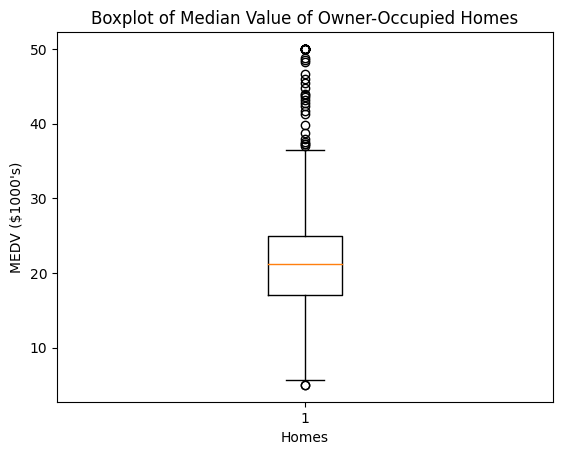

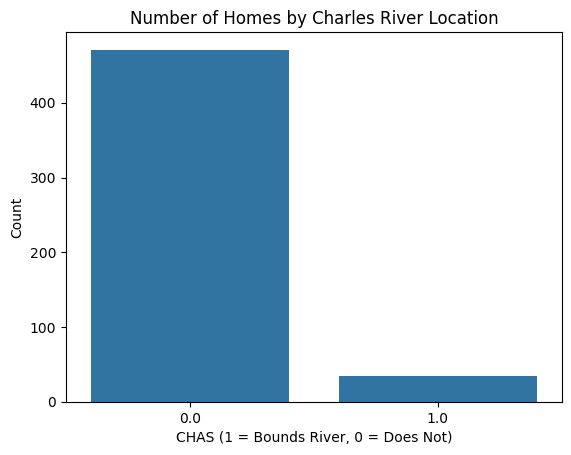

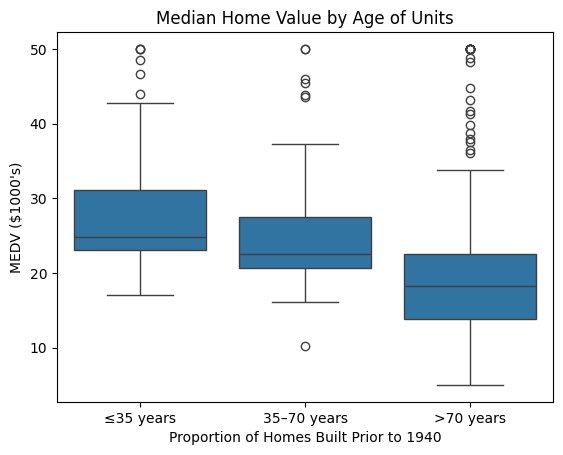

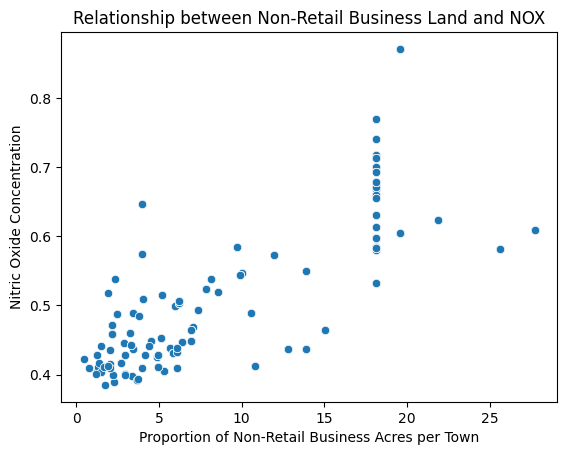

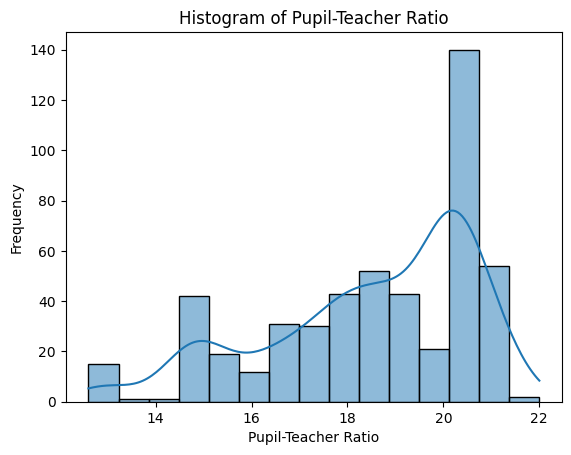


T-test: CHAS vs MEDV
t-statistic: 3.996437466090509 p-value: 7.390623170519905e-05
Conclusion: Reject H0 → Significant difference in MEDV near the river.

ANOVA: MEDV across AGE groups
F-statistic: 36.40764999196599 p-value: 1.7105011022702984e-15
Conclusion: Reject H0 → At least one group differs.

Pearson Correlation: NOX vs INDUS
Correlation coefficient: 0.7636514469209192 p-value: 7.913361061210442e-98
Conclusion: Reject H0 → Significant relationship between NOX and INDUS.

Regression: DIS predicting MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        23:51:48   Log-Likelihood:                -1823.9
No. Observ

In [9]:
# Install packages if needed (for Pyodide / piplite environments)
import piplite
await piplite.install(['numpy','pandas','seaborn','matplotlib','scipy','statsmodels'])

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from js import fetch
import io

# Load dataset from URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)

# ----------------------------------------------------------
# Task 2: Visualizations
# ----------------------------------------------------------

# Boxplot of MEDV
plt.boxplot(boston_df["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.xlabel("Homes")
plt.ylabel("MEDV ($1000's)")
plt.show()

# Bar plot for CHAS
sns.countplot(x="CHAS", data=boston_df)
plt.title("Number of Homes by Charles River Location")
plt.xlabel("CHAS (1 = Bounds River, 0 = Does Not)")
plt.ylabel("Count")
plt.show()

# Boxplot of MEDV vs AGE groups
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"],
                                bins=[0,35,70,100],
                                labels=["≤35 years","35–70 years",">70 years"])
sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df)
plt.title("Median Home Value by Age of Units")
plt.xlabel("Proportion of Homes Built Prior to 1940")
plt.ylabel("MEDV ($1000's)")
plt.show()

# Scatter plot of NOX vs INDUS
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
plt.title("Relationship between Non-Retail Business Land and NOX")
plt.xlabel("Proportion of Non-Retail Business Acres per Town")
plt.ylabel("Nitric Oxide Concentration")
plt.show()

# Histogram of PTRATIO
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# ----------------------------------------------------------
# Task 3: Statistical Tests
# ----------------------------------------------------------

alpha = 0.05

# T-test: CHAS vs MEDV
medv_river = boston_df[boston_df["CHAS"]==1]["MEDV"]
medv_no_river = boston_df[boston_df["CHAS"]==0]["MEDV"]
t_stat, p_val = scipy.stats.ttest_ind(medv_river, medv_no_river)
print("\nT-test: CHAS vs MEDV")
print("t-statistic:", t_stat, "p-value:", p_val)
if p_val < alpha:
    print("Conclusion: Reject H0 → Significant difference in MEDV near the river.\n")
else:
    print("Conclusion: Fail to reject H0 → No significant difference.\n")

# ANOVA: MEDV across AGE groups
group1 = boston_df[boston_df["AGE_Group"]=="≤35 years"]["MEDV"]
group2 = boston_df[boston_df["AGE_Group"]=="35–70 years"]["MEDV"]
group3 = boston_df[boston_df["AGE_Group"]==">70 years"]["MEDV"]
f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print("ANOVA: MEDV across AGE groups")
print("F-statistic:", f_stat, "p-value:", p_val)
if p_val < alpha:
    print("Conclusion: Reject H0 → At least one group differs.\n")
else:
    print("Conclusion: Fail to reject H0 → No significant difference.\n")

# Pearson Correlation: NOX vs INDUS
corr, p_val = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Pearson Correlation: NOX vs INDUS")
print("Correlation coefficient:", corr, "p-value:", p_val)
if p_val < alpha:
    print("Conclusion: Reject H0 → Significant relationship between NOX and INDUS.\n")
else:
    print("Conclusion: Fail to reject H0 → No significant relationship.\n")

# Regression: DIS → MEDV
X = sm.add_constant(boston_df["DIS"])
y = boston_df["MEDV"]
model = sm.OLS(y, X).fit()
print("Regression: DIS predicting MEDV")
print(model.summary())
